In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [14]:
# Load the dataset
heart_dataset = pd.read_csv("D:\\python AC\\PredictionOutbreaks\\datasets\\heart.csv")


In [15]:
# Display basic info
display(heart_dataset.head())
print("Dataset Shape:", heart_dataset.shape)
print("\nDataset Description:\n", heart_dataset.describe())
print("\nClass Distribution:\n", heart_dataset['target'].value_counts())
print("\nGrouped Mean by Target:\n", heart_dataset.groupby('target').mean())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset Shape: (303, 14)

Dataset Description:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.3

In [16]:
# Prepare features and target
X = heart_dataset.drop(columns=['target'], axis=1)
y = heart_dataset['target']


In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)


SVC(kernel='linear')

In [20]:
# Make predictions
y_pred = model.predict(X_test)

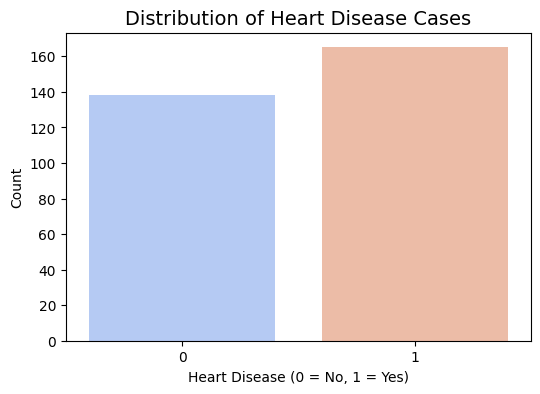

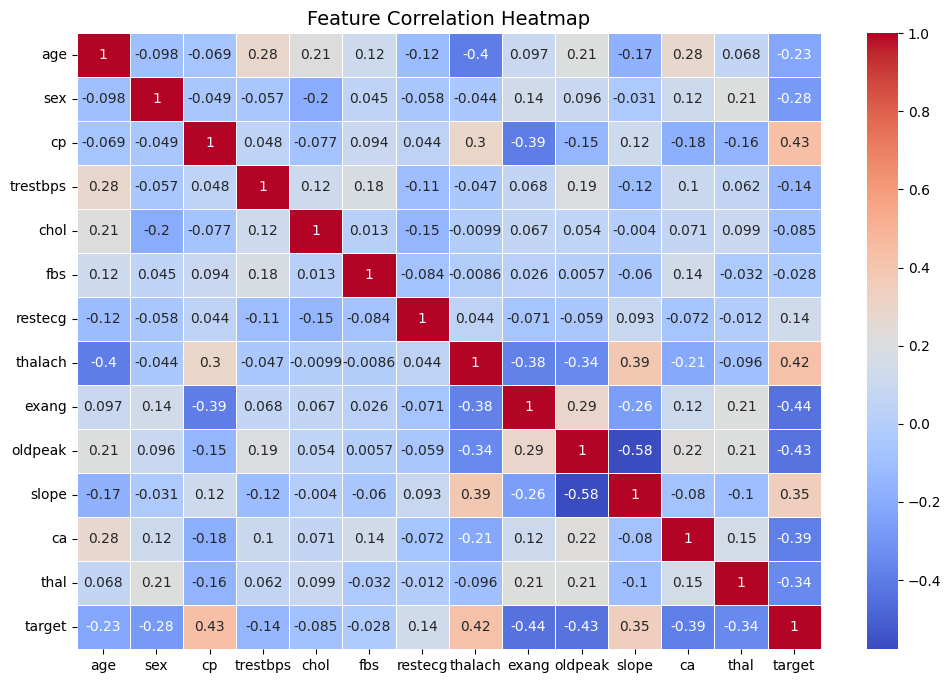

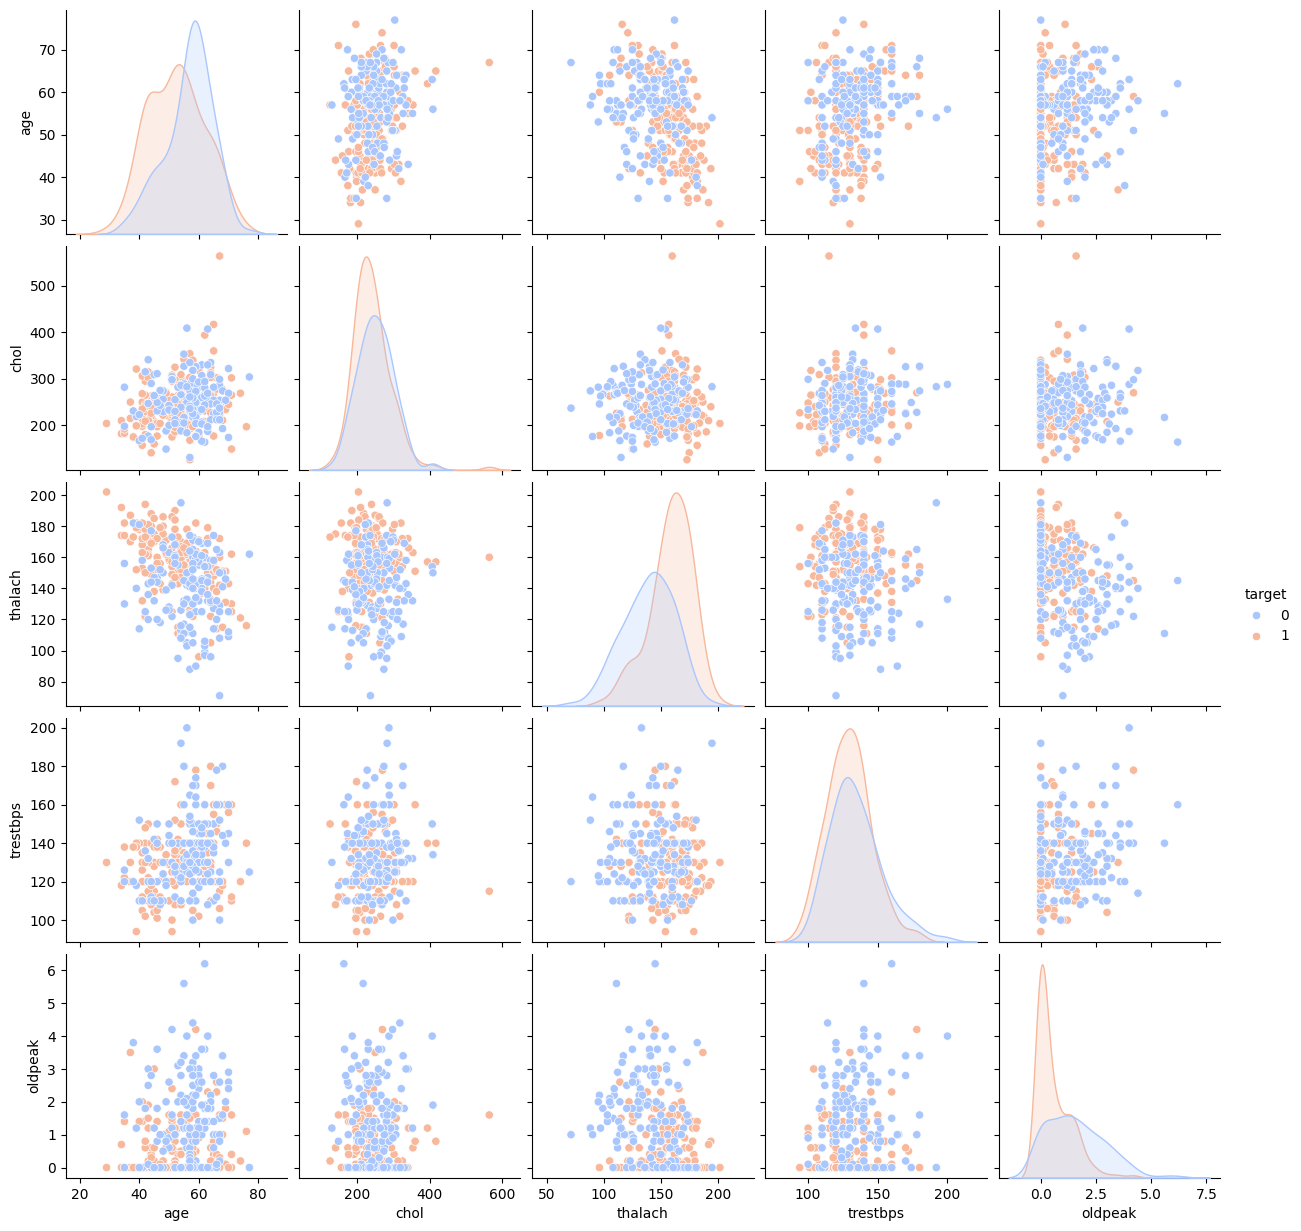

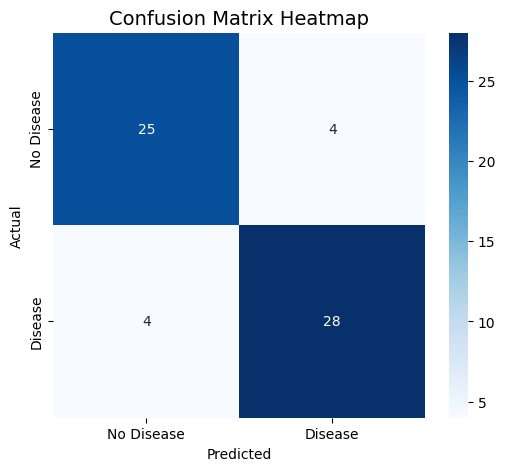

In [21]:
# Compute Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# ----- 1. Class Distribution -----
plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette="coolwarm", legend=False)  # Fix applied
plt.title("Distribution of Heart Disease Cases", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# ----- 2. Feature Correlation Heatmap -----
plt.figure(figsize=(12, 8))
sns.heatmap(heart_dataset.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# ----- 3. Pairplot of Key Features -----
selected_features = ['age', 'chol', 'thalach', 'trestbps', 'oldpeak']
sns.pairplot(heart_dataset[selected_features + ['target']], hue="target", palette="coolwarm")
plt.show()

# ----- 4. Confusion Matrix Heatmap -----
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


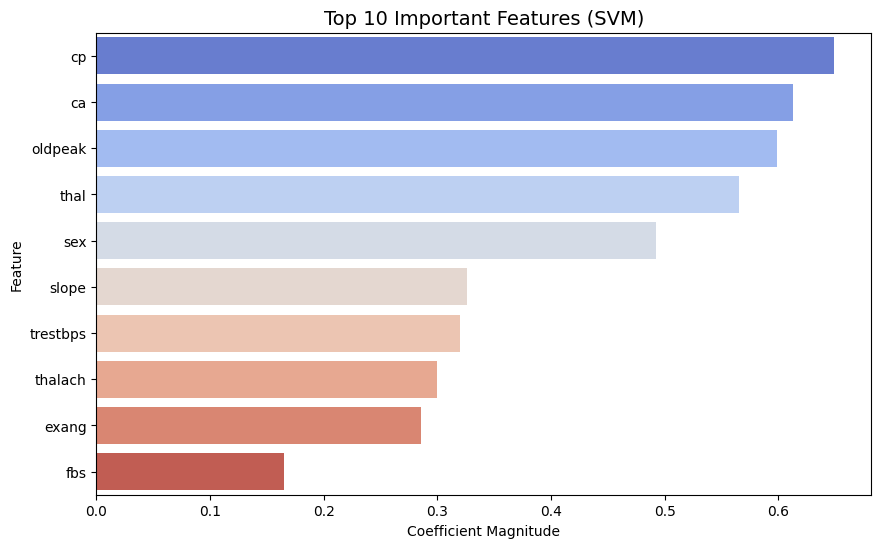

In [22]:
# ----- 5. Feature Importance using SVM Coefficients -----
feature_importance = np.abs(model.coef_).flatten()
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(10,6))
sns.barplot(x=sorted_importance[:10], y=sorted_features[:10], hue=sorted_features[:10], dodge=False, palette="coolwarm")
plt.title("Top 10 Important Features (SVM)", fontsize=14)
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score  # Add this if missing

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.8689
Precision: 0.8750
Recall: 0.8750
F1 Score: 0.8750

Confusion Matrix:
 [[25  4]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [24]:
# Save trained model
filename = 'D:\\python AC\\PredictionOutbreaks\\saved_models\\heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))
print("\nModel saved successfully as 'heart_disease_model.sav'")


Model saved successfully as 'heart_disease_model.sav'
